<img src="https://www.epfl.ch/about/overview/wp-content/uploads/2020/07/logo-epfl-1024x576.png" style="padding-right:10px;width:140px;float:left"></td>
<h2 style="white-space: nowrap">Image Processing Laboratory Notebooks</h2>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">
This Juypter notebook is part of a series of computer laboratories which are designed
to teach image-processing programming; they are running on the EPFL's Noto server. They are the practical complement of the theoretical lectures of the EPFL's Master course <b>Image Processing II</b> 
(<a href="https://moodle.epfl.ch/course/view.php?id=463">MICRO-512</a>) taught by Dr. D. Sage, Dr. M. Liebling, Prof. M. Unser and Prof. D. Van de Ville.
</p>
<p style="font-size:0.85em; margin:2px; text-align:justify">
The project is funded by the Center for Digital Education and the School of Engineering. It is owned by the <a href="http://bigwww.epfl.ch/">Biomedical Imaging Group</a>. 
The distribution or the reproduction of the notebook is strictly prohibited without the written consent of the authors.  &copy; EPFL 2021.
</p>
<p style="font-size:0.85em; margin:0px"><b>Authors</b>: 
    <a href="mailto:pol.delaguilapla@epfl.ch">Pol del Aguila Pla</a>, 
    <a href="mailto:kay.lachler@epfl.ch">Kay Lächler</a>,
    <a href="mailto:alejandro.nogueronaramburu@epfl.ch">Alejandro Noguerón Arámburu</a>,
    <a href="mailto:daniel.sage@epfl.ch">Daniel Sage</a>, and
    <a href="mailto:jaejun.yoo@epfl.ch">Jaejun Yoo</a>.
     
</p>
<hr style="clear:both">
<h1>Lab 7.2: Neural Networks: Application</h1>
<div style="background-color:#F0F0F0;padding:4px">
    <p style="margin:4px;"><b>Released</b>: Thursday May 26, 2022</p>
    <p style="margin:4px;"><b>Submission</b>: <span style="color:red">Friday June 10, 2022</span> (before 11:59PM) on <a href="https://moodle.epfl.ch/course/view.php?id=463">Moodle</a></p>
    <p style="margin:4px;"><b>Grade weigth</b>: Lab 7 (28 points), 7.5 % of the overall grade</p>
    <p style="margin:4px;"><b>Remote help</b>: Thursday 2nd of June (on Zoom and ELD 020) and Monday 6th of June, 2022 on Zoom (see Moodle for link)</p>    
    <p style="margin:4px;"><b>Related lectures</b>: Chapter 11</p>
</div>

### Student Name: Guanqun LIU
### SCIPER: 334988

Double-click on this cell and fill your name and SCIPER number. Then, run the cell below to verify your identity in Noto and set the seed for random results.

In [1]:
import getpass
# This line recovers your camipro number to mark the images with your ID
uid = int(getpass.getuser().split('-')[2]) if len(getpass.getuser().split('-')) > 2 else ord(getpass.getuser()[0])
print(f'SCIPER: {uid}')

SCIPER: 334988


## <a name="imports_"></a> Imports
In the next cell we import Python libraries we will use throughout the lab.
<!-- , as well as the `IPLabViewer` class, created specifically for this course, which provides interactive image visualization based on the `ipywidgets` library: -->
* [`matplotlib.pyplot`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.html), to display images,
<!-- * [`ipywidgets`](https://ipywidgets.readthedocs.io/en/latest/), to make the image display interactive, -->
* [`numpy`](https://numpy.org/doc/stable/reference/index.html), for mathematical operations on arrays,
* [`torch`](https://pytorch.org/), for comparing the results of our manual implementation with pytorch autograd,
* [`sklearn`](https://scikit-learn.org/stable/), for the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.
<!-- We will then load the `IPLabViewer` class (see the documentation [here](https://github.com/Biomedical-Imaging-Group/IPLabImageViewer/wiki/Python-IPLabViewer()-Class) or run the Python command `help(viewer)` after loading the class). -->

Finally, we load the images you will use in the exercise to test your functions. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2 as cv 
import torch
from sklearn.model_selection import train_test_split

# Import IPLabViewer() Class
from interactive_kit import imviewer as viewer

%matplotlib widget
# Fix random seeds for reproducible results
np.random.seed(123)
torch.manual_seed(123)

# Load the images
input_img = cv.imread('images/input.png', cv.IMREAD_UNCHANGED)
label_img = cv.imread('images/label.png', cv.IMREAD_UNCHANGED)
input_img_test = cv.imread('images/test_input.tiff', cv.IMREAD_UNCHANGED)
label_img_test = cv.imread('images/test_label.tiff', cv.IMREAD_UNCHANGED)

# Neural Networks: Application (8 points)

In this laboratory we propose to study some applications of neural networks, namely pixel classification. If you still have questions concerning either programming or the lab in general, don't hesitate to contact one of the TAs listed on [Moodle](https://moodle.epfl.ch/course/view.php?id=463).

## <a id="ToC_2_WT"></a>Table of contents
1. [Multiclass pixel classification](#1.-Multiclass-pixel-classification)
    1. [Data preparation](#1.A.-Data-preparation)
        1. [Creating the input and target dataset](#1.A.a.-Creating-the-input-and-target-dataset)
        2. [Split the datasets into train and validation sets](#1.A.b.-Split-the-datasets-into-train-and-validation-sets)
        3. [Creating the DataLoader](#1.A.c.-Creating-the-DataLoader)
    2. [Softmax and cross-entropy loss for multiclass classification](#1.B.-Softmax-and-cross-entropy-loss-for-multiclass-classification)
        1. [Softmax in NumPy](#1.B.a.-Softmax-in-NumPy-(1-point)) **(1 point)**
        2. [Softmax in PyTorch](#1.B.b.-Softmax-in-PyTorch)
        3. [Cross-entropy in NumPy](#1.B.c.-Cross-entropy-in-NumPy-(2-points)) **(2 points)**
        4. [Cross-entropy in PyTorch](#1.B.d.-Cross-entropy-in-PyTorch)
    3. [Build a model and train it with PyTorch](#1.C.-Build-a-model-and-train-it-with-PyTorch)
        1. [Define the model](#1.C.a.-Define-the-model-(2-points)) **(2 points)**
        2. [Complete the training pipeline](#1.C.b.-Complete-the-training-pipeline-(2-points)) **(2 points)**
        3. [Test the model on a test image](#1.C.c-Test-the-model-on-a-test-image)
        4. [Classwise accuracy](#1.C.d.-Classwise-accuracy)
    4. [Class imbalance problem](#1.D.-Class-imbalance-problem)
        1. [Add weights to the loss function](#1.D.a.-Add-weights-to-the-loss-function-(1-point)) **(1 point)**


# 1. Multiclass pixel classification
[Back to table of contents](#ToC_2_WT)

Throughout this lab, we will focus on applying neural networks to the characterization of the cell nuclei of histopathology tissue. This is a routine task in clinics, and it is generally done on color stained images. The most widely used stain is H&E (Hematoxylin and Eosin), that highlights the nuclei in dark color. 

Run the cell below to visualize the images that we will use for this.
<div class="alert alert-info">
    <b>Note:</b> If you click on <code>Options</code>, you can enable the <code>Joint Zoom</code> and zoom into different areas of the image to see how the pixels are classified.
</div>

In [3]:
plt.close('all')
view = viewer([input_img, label_img], title=['Input Image', 'Grount Truth Classification'], subplots=(1,2), widgets=True)

As you can see in the images above, in the label we have three color levels, $1)$ nuclei in brown, $2)$ nuclei in dark purple, and $3)$ background in bright purple. The goal is to automatically segment the image by assigning one of these three classes to every pixel of the input image. For this lab, using the above images as training dataset, we will train a fully connected neural network to classify pixels based on their three input values: red, green and blue (RGB). Then, we will test this trained network on a larger stained image.

## 1.A. Data preparation
### 1.A.a. Creating the input and target dataset
[Back to table of contents](#ToC_2_WT)

First, we need to create our desired output classes. As we know, the label image consists of only three distinct RGB values, so we assign a number $(0$, $1$ or $2)$ to each one of these values and create an array that maps each pixel of the labeled image to one of these three classes. For this we use the [`np.unique`](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) function with the argument `return_inverse=True`, which returns the three unique RGB values as well as the mentioned array that maps each pixel to one of the classes.

<div class="alert alert-info">
    <b>Note:</b> Since the input to our neural network will be a vector of RGB values, we flatten the labeled image into a vector as well, before assigning the pixels to their classes. For that, we use the <code>np.array</code> method <code>reshape</code>.
</div>

In [4]:
# Create labels
pixel_rgb_val, train_label_class_index = np.unique(label_img.reshape((-1, 3)), axis=0, return_inverse=True)
print(f'The three unique RGB values of the labeled image are:\n{pixel_rgb_val}')

The three unique RGB values of the labeled image are:
[[ 88  78 109]
 [159 134 142]
 [187 180 180]]


Now we create the PyTorch tensors `net_input` and `net_target` from our images. The input should be a vector of RGB values and the output should be a simple vector with the corresponding classes. Run the next cell to do so.

In [5]:
# The input should be of type float
net_input = torch.FloatTensor(input_img.reshape((-1, 3)))
# The target class should be of type long
net_target = torch.LongTensor(train_label_class_index)
print(f'Input size: {net_input.shape}, target size: {net_target.shape}')

Input size: torch.Size([22500, 3]), target size: torch.Size([22500])


### 1.A.b. Split the datasets into train and validation sets
[Back to table of contents](#ToC_2_WT)

The size of our cell image is $(150 \times 150)$ pixels and thus, we have a total of $150 \times 150 = 22,500$ RGB pixels. In order to monitor the training process, we need to split our dataset into a training and a validation set, which is typically done in a ratio of $20\%$ validation to $80\%$ training. The difference between a test set, as we used it in the first notebook, and a validation set, is that the validation set helps us to monitor the performance of the model during the training process, while a test set is usually used to measure the performance of the final trained model. As such, a validation set is usually used to calculate the accuracy of the model on new data at each training step, which helps to detect [overfitting](https://www.investopedia.com/terms/o/overfitting.asp). For this we will again use the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from [`sklearn`](https://scikit-learn.org/stable/) as in the previous notebook, but here the generated test set will be our validation set. Run the cell below to create the train and validation sets.
<div class="alert alert-info">
    <b>Note:</b> As mentioned before, our <b>test set</b> will consist of one larger stained cell image that we loaded as <code>input_img_test</code> and <code>label_img_test</code>.
</div>

In [6]:
# ratio between training and validation sets
validation_ratio = 0.2

splitting = train_test_split(net_input, net_target, test_size=validation_ratio, random_state=0)
net_train_input, net_valid_input, net_train_target, net_valid_target = splitting
print(f'The training set contains {len(net_train_input)} pixels and the validation set contains {len(net_valid_input)} pixels.')

The training set contains 18000 pixels and the validation set contains 4500 pixels.


### 1.A.c. Creating the DataLoader
[Back to table of contents](#ToC_2_WT)

In the [first part of the lab](./1_NN_Basics.ipynb), we used very few samples to train our networks and so we could simply use the entire dataset at once for the training. Now that we have a lot more samples, we need to train our model on small batches, called minibatches, of the entire dataset, otherwise there might not be enough memory available to handle the calculation of all the derivatives. 

To do this, we will create a `DataLoader` that serves 100 samples as a minibatch for each training step. 

PyTorch provides two data primitives: [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). They allow you to use pre-loaded datasets as well as your own data. `Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable* around the Dataset to enable easy access to the samples. 

In this exercise, we will see how to make a custom `Dataset` class. 
`torch.utils.data.Dataset` is an abstract class representing a dataset and its template is as follows:
```python
class Your_Custom_Dataset_Name(Dataset):
    def __init__(self, x):
        super().__init__()
        self.x = x        

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx]
```

Your custom dataset should inherit `Dataset` and override the following methods:

* **`__len__`** so that `len(dataset)` returns the size of the dataset.
* **`__getitem__`** to support the indexing such that `dataset[i]` can be used to get the $i^{\mathrm{th}}$ sample of the dataset.

If you want to see another example, you can check out the [PyTorch tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#dataset-class) on the Dataset class. 

_*"An iterable is any Python object capable of returning its members one at a time, permitting it to be iterated over in a for-loop."_

Run the cell below to define the custom `DataLoader`.

In [7]:
from torch.utils.data import Dataset, DataLoader

# Use the dataset template for your own data! 
class CellDataset(Dataset):
    # Initializes the dataset with our input data and labels
    def __init__(self, data, labels):
        super().__init__()
        self.data = data
        self.labels = labels

    # Returns the length of the dataset
    def __len__(self):
        return len(self.data)
    
    # Returns the item at index idx
    def __getitem__(self, idx):
        # We return the input and target values
        return self.data[idx], self.labels[idx]

# Train in batch mode
batch_size = 100
    
# DataLoader
train_loader = DataLoader(dataset=CellDataset(net_train_input, net_train_target), batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=CellDataset(net_valid_input, net_valid_target), batch_size=batch_size, shuffle=False)

print(f'train_loader:\n\tnumber of batches: {len(train_loader)}, samples per batch: {len(iter(train_loader).__next__()[0])}')
print(f'valid_loader:\n\tnumber of batches: {len(valid_loader)}, samples per batch: {len(iter(valid_loader).__next__()[0])}')

train_loader:
	number of batches: 180, samples per batch: 100
valid_loader:
	number of batches: 45, samples per batch: 100


## 1.B. Softmax and cross-entropy loss for multiclass classification
[Back to table of contents](#ToC_2_WT)

To solve a classification problem using a neural network, at some point, one needs to map a network output $x$ (which is unbounded) into the value between $0$ and $1$ so that it can be interpreted as a probability for each class $i\in \{1, \ldots, C\}$. For the binary classification problem in the previous notebook, we used the sigmoid function to map the single output value to the range $[0,1]$. Now, for the multiclass classification problem, we need a function that can act on multiple values at once, for which, we will use the [softmax](https://en.wikipedia.org/wiki/Softmax_function) function:

$$\sigma(x)_i = \frac{e^{x_i}}{\sum_{j=1}^Ce^{x_j}}$$
where $C$ is the total number of classes (in our case 3).

In the deep learning community, $x$ is typically referred to as `logits`, which is the vector of raw predictions that a classification model generates. For the multiclass classification problem, $x$ is normalized by using the softmax function, which generates a vector of probabilities corresponding to each of the classes, and $\Sigma_{i=0}^{N} \sigma(x)_i  = 1$, that is, the sum of all the elements of this probability vector is $1$. Then, we can measure the performance of a classification model using the `cross_entropy` loss,  which increases as the predicted probability diverges from the actual label. 

In the next sections we will go through a series of simple toy examples to clarify these concepts.

### 1.B.a. Softmax in NumPy (1 point)
[Back to table of contents](#ToC_2_WT)

Let's start by implementing the mentioned softmax function. In the cell below, **for 1 point** implement the softmax function from scratch using only NumPy operators.

<div class="alert alert-warning">
    <b>Important:</b> Do not use for loops!
</div>

In [8]:
# Function that calculates the softmax of an input vector x
def softmax(x):
    out = None
    out = np.exp(x) / np.exp(x).sum()
    
    return out

As usual, run the next cell for a quick sanity check.

In [9]:
# Input vector
x = np.array([2.0, 1.0 ,0.1])
# Calculate softmax
outputs = softmax(x)
print(f'Your softmax output for x={x} is {np.round(outputs, 4)}')
# Check that the sum is 1
if np.round(sum(outputs), 4) != 1:
    print(f'WARNING\nThe sum of the softmax output should always be 1, yours is {sum(outputs):.4f}')
else:
    print('Nice, you passed the sanity check. This does NOT guarantee the points though!')

Your softmax output for x=[2.  1.  0.1] is [0.659  0.2424 0.0986]
Nice, you passed the sanity check. This does NOT guarantee the points though!


### 1.B.b. Softmax in PyTorch
[Back to table of contents](#ToC_2_WT)

As you may already have guessed, we can also use PyTorch to calculate the softmax. For this we can make use of the function [`torch.nn.Softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html), which we will now use to test your NumPy implementation. Run the cell below to check that your `softmax` function produces the same result as the one from PyTorch.

In [10]:
# Create the input tensor
x_tc = torch.tensor([2.0, 1.0 ,0.1])
# Calculate the softmax with PyTorch
softmax_tc = torch.nn.Softmax(dim=0)
# torch.nn.Softmax() returns a function which we can evaluate on any input
outputs_tc = softmax_tc(x_tc)
print(f'The PyTorch softmax output is {outputs_tc}')
# Check that the outputs are equal
np.testing.assert_array_almost_equal(outputs_tc, outputs, err_msg = 'Your NumPy implementation does not match the PyTorch output!')
print('Great! Your sofmax produced the same result as PyTorch.')

The PyTorch softmax output is tensor([0.6590, 0.2424, 0.0986])
Great! Your sofmax produced the same result as PyTorch.


### 1.B.c. Cross-entropy in NumPy (2 points)
[Back to table of contents](#ToC_2_WT)

Cross-entropy is commonly used in classification tasks both in traditional machine learning and deep learning. It is defined as

$$\operatorname{H}(y, t) = -\sum_{i=1}^Ct_i\log(y_i)$$
with $y$ the prediction and $t$ the target vector.

and it measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy increases as the predicted probability diverges from the actual label. So predicting a probability of $y = [0.01, 0.00, 0.99]$ when the actual observation label is $t = [1,0,0]$ would be bad and result in a high loss value. A perfect prediction on the other hand would result in a cross-entropy loss of 0.

In the next cell, **for 1 point**, implement the `cross_entropy` function that calculates the cross entropy loss as defined in the formula above from scratch, only using NumPy operators.

In [11]:
# Function that calculates the cross-entropy loss
def cross_entropy(predicted, target):
    loss = None
    
    # YOUR CODE HERE
    loss = - (target * np.log(predicted)).sum()
    
    return loss

Run the next cell for a simple sanity check that checks your function for a very good and a very bad example prediction.

In [12]:
# Check that the loss of a very good prediction is 0
good_prediction = np.round(cross_entropy(np.array([1, 1e-5, 1e-5]), np.array([1, 0, 0])), 4)
assert good_prediction == 0, f'The cross-entropy loss of a very good prediction should be 0. Your loss is {good_prediction}.'
# Check that the loss of a very bad prediction is large
bad_prediction = np.round(cross_entropy(np.array([1e-5, 1, 1]), np.array([1, 0, 0])), 4)
if bad_prediction != 11.5129:
    print(f'WARNING!!\nThe cross-entropy loss of a very bad prediction should be large (11.5129). Your loss is {bad_prediction}.')
else:
    print('Good, your cross_entropy function provides the correct result for these simple test cases. Make sure to double check it anyway!')

Good, your cross_entropy function provides the correct result for these simple test cases. Make sure to double check it anyway!


Now, you can use the next cell to try different prediction-target combinations. This might help you in the upcoming MCQ.

In [13]:
# Remember that target is one-hot encoded (binary indicator of each class)
# And the predictions vector should sum to 1
# YOUR CODE HERE
error_1 = cross_entropy(np.array([0.7, 0.2, 0.1]), np.array([1, 0, 0]))
error_2 = cross_entropy(np.array([0.1, 0.3, 0.6]), np.array([1, 0, 0]))
error_3 = cross_entropy(softmax(np.array([2.0, 1.0, 0.1])), np.array([1, 0, 0]))
print(error_1,error_2,error_3)

0.35667494393873245 2.3025850929940455 0.4170300162778335


### Multiple Choice Question

Now at this point you may be asking yourself, does this make sense? If you looked closely at the cross-entropy values, there must be some intuitive order among the errors given the predictions. That said, for **1 point** answer the following. 

* Q1. Assume we calculate the cross-entropy errors `error_1 = cross_entropy([0.7, 0.2, 0.1], [1, 0, 0])`, `error_2 = cross_entropy([0.1, 0.3, 0.6], [1, 0, 0])`, and `error_3 = cross_entropy(softmax([2.0, 1.0 ,0.1]), [1, 0, 0])`.<br>What will be the order of the errors, from low to high? 

1. `error_1` < `error_2` < `error_3`
2. `error_1` < `error_3` < `error_2`
3. `error_2` < `error_1` < `error_3`
4. `error_2` < `error_3` < `error_1`
5. `error_3` < `error_1` < `error_2`
6. `error_3` < `error_2` < `error_1`

Modify the variable answer in the following cell to reflect your choice. 

In [14]:
# Assign your answer to this variable
answer = 2

# YOUR CODE HERE

In [15]:
# Sanity check
if not(answer in [1, 2, 3, 4, 5, 6]):
    print('WARNING!!\nChoose one of 1, 2, 3, 4, 5 or 6.')

### 1.B.d. Cross-entropy in PyTorch
[Back to table of contents](#ToC_2_WT)

Of course PyTorch also provides a cross-entropy loss function: [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html). However, this function combines the softmax together with the original cross-entropy function, which are averaged across observations for each minibatch of size $N$, so that the input to the PyTorch cross-entropy function is not the output of the softmax, but simply the `logits`, which is the raw unbounded net output:

$$\text{CrossEntropyLoss}()= \frac{\sum^{N}_{n=1} \mathrm{H}(x^{(n)}, i^{(n)})}{N},$$
$$\text{where}\quad\mathrm{H}(x, i) = -\log\left(\frac{e^{x_i}}{\sum_{j=1}^C e^{x_j}}\right)$$
with $N$ the number of samples per minibatch, $x$ the prediction and $i$ the target class index.

In addition, the target input of the [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) is the **target class index** instead of the one-hot encoded vector used before.

Let's check now if the results obtained from PyTorch match the ones from our own NumPy function. Run the cell below to do so. 

In [16]:
# NumPy input and target vector
x = np.array([2.0, 1.0 ,0.1])
target = np.array([1, 0, 0])
# Calculate softmax
x_sm = softmax(x)
# Calculate NumPy cross-entropy
outputs = cross_entropy(x_sm, target)

# Create the input and target tensor (needs to be 2-dimensional)
x_tc = torch.tensor([x])
# The class index 0 corresponds to [1, 0, 0]
target_tc = torch.tensor([0])
# Get the PyTorch cross entropy function and evaluate it
cross_entropy_loss_tc = torch.nn.CrossEntropyLoss()
outputs_tc = cross_entropy_loss_tc(x_tc, target_tc)

print(f'Your cross-entropy output is {outputs:.4f}.')
print(f'The PyTorch cross-entropy output is {outputs_tc:.4f}.')
# Check that the outputs are equal
np.testing.assert_array_almost_equal(outputs_tc, outputs)
print('Nice! Your cross-entropy produced the same result as PyTorch.')

Your cross-entropy output is 0.4170.
The PyTorch cross-entropy output is 0.4170.
Nice! Your cross-entropy produced the same result as PyTorch.


## 1.C. Build a model and train it with PyTorch
### 1.C.a. Define the model (2 points)
[Back to table of contents](#ToC_2_WT)

To begin this section, and **for 2 points, complete the function `build_model`** that defines a model with three linear layers ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)) (input, hidden and output) of which the first two also have a ReLU activation function ([`torch.nn.ReLU`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)). The output layer does not have an activation function since we want the output to be the `logits`, which we can then use as an input to the cross-entropy loss function. Use the [`torch.nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) module to build the model and run the cell below the next one to check that your answers are valid. Note that `build_model` has no input parameters, and the described model as output.

<div class=" alert alert-info">
    
**Note:** If you don't remember how to build a model using [`torch.nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html), look at section 1.B.c. of the [previous notebook](./1_NN_Basics.ipynb) again.  
</div> 
<div class=" alert alert-warning">
    
**Important:** We want the hidden layer to have 64 neurons. You need to choose the appropriate input and output size corresponding to our data! You will need to hardcode it in the function, as it has no input parameters.
</div> 
<div class=" alert alert-info">
    
**Hint:** Our goal is to classify an RGB pixel into one of three classes. 
</div>

In [17]:
# Build a model with the given hyper-parameters
model = None

def build_model():
    # Hard-code hyper-parameters (change values)
    input_size = 3
    hidden_size = 64
    output_size = 3
    
    # Initialize model variable (to redefine)
    model = None
    model = torch.nn.Sequential(
        torch.nn.Linear(input_size,hidden_size),
        torch.nn.ReLU(inplace=True),
        torch.nn.Linear(hidden_size,hidden_size),
        torch.nn.ReLU(inplace=True),
        torch.nn.Linear(hidden_size,output_size)
    ) 

    return model

# Declare the model
model = build_model()
print(f'The total number of parameters in your model is: {sum([np.prod(list(pnb.size())) for pnb in model.parameters()])}\n')
print(f'This is your model:\n{model}')

The total number of parameters in your model is: 4611

This is your model:
Sequential(
  (0): Linear(in_features=3, out_features=64, bias=True)
  (1): ReLU(inplace=True)
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU(inplace=True)
  (4): Linear(in_features=64, out_features=3, bias=True)
)


Run the next cell to perform an elaborate test on your model. It checks everything from the number and type of layers up to the input and output sizes of the layers, so that you can be sure that you have a correct model to continue the lab.

In [18]:
# First we redeclare the model, to be sure
model = build_model()
# Check that the model has 5 layers
assert len(model._modules.items()) == 5, f'The model should have a total of 5 layers: 3 linear and 2 ReLU. Yours currently has {len(model._modules.items())} layers.'
# Check that the layer types are correct
for i, layer in enumerate(model._modules.items()):
    current_layer = torch.nn.modules.linear.Linear if i % 2 == 0 else torch.nn.modules.activation.ReLU
    assert type(layer[1]) == current_layer, f'Layer {i} should be of type {current_layer}, not {type(layer[1])}.'
# Check that the input and output size of the layers is correct and that torch.nn.Sequential was used
for i, module in enumerate(model.modules()):
    if i == 0:
        assert type(module) == torch.nn.modules.container.Sequential, 'You should use torch.nn.Sequential to build your model!'
    if i == 1:
        assert module.in_features == 3, f'The input size of layer {i-1} ({module.in_features}) is not correct. Remember that we are trying to classify RGB pixels.'
        assert module.out_features == 64, f'The output size of layer {i-1} ({module.out_features}) is not correct. Remember that the hidden layer should be of size 64.'
    if i == 3:
        assert module.in_features == 64, f'The input size of layer {i-1} ({module.in_features}) is not correct. Remember that the hidden layer should be of size 64.'
        assert module.out_features == 64, f'The output size of layer {i-1} ({module.out_features}) is not correct. Remember that the hidden layer should be of size 64.'
    if i == 5:
        assert module.in_features == 64, f'The input size of layer {i-1} ({module.in_features}) is not correct. Remember that the hidden layer should be of size 64.'
        assert module.out_features == 3, f'The output size of layer {i-1} ({module.out_features}) is not correct. Remember that the output size should be equal to the number of classes we have.'

print('Well done! The model seems to be correct.')

Well done! The model seems to be correct.


### 1.C.b. Complete the training pipeline (2 points)
[Back to table of contents](#ToC_2_WT)

Now that we have the desired model, we need to implement the training workflow that optimizes our model. The basic structure has already been created so you only need to implement some of the important steps. In the next cell, **for 2 points**, complete the function `train` that takes as input parameters:
* `model` : A PyTorch model, e.g. the output of `build_model`,
* `train_loader` : The training `DataLoader` that we defined in section [1.A.c.](#1.A.c.-Creating-the-DataLoader),
* `valid_loader` : The validation `DataLoader` that we defined in section [1.A.c.](#1.A.c.-Creating-the-DataLoader),
* `optimizer` : An optimization function from the [`torch.optim`](https://pytorch.org/docs/stable/optim.html) module. Here we use [`torch.optim.Adam`](https://pytorch.org/docs/master/generated/torch.optim.Adam.html),
* `loss_fn` : A loss function of the form `loss_fn(predicted, target)`. Here we use [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html),
* `max_iter` : The maximum number of training batches to use (defaults to 50),
* `save_model` : Tells the function if it should save the best model during training. Defaults to `True`, and 
* `save_model_name` : The name under which the model will be saved, defaults to `'best_model'`.

and returns the evolution (history) of the training and validation loss as well as the highest validation accuracy achieved.

<div class = 'alert alert-info'>
    <b>Hint:</b> If in doubt, you can take inspiration from the training workflows we defined in the first part of the notebook.
</div>

In [24]:
def train(model, train_loader, valid_loader, optimizer, loss_fn, max_iter=50, save_model_name='best_model', save_model=True):
    # Some initializations
    lowest_loss = np.inf
    highest_accuracy = 0.
    train_loss, valid_loss, train_accuracy, valid_accuracy = [], [], [], []
    train_batch_loss, correct, lowest_iteration = 0, 0, 0
    
    # Tell the model that we are in training mode
    model.train()
    
    # Iterate through the training minibatches
    for i, data in enumerate(train_loader):
        # Extract the train and target minibatches
        x_i, y_i = data[0], data[1]
        
        # Get the current loss value and training predictions (forward pass)
        # Use the same variable names as the ones initialized next
        loss, y_hat_i = None, None
        y_hat_i = model(x_i)
        loss = loss_fn(y_hat_i, y_i)

        # Perform the backward pass (remember to first reset the gradients)
        optimizer.zero_grad()
        loss.backward()
        
        # Perform one training step (optimization)
        optimizer.step()

        # Calculate the average loss
        train_batch_loss = float(loss) / len(y_i)
        train_loss.append(train_batch_loss)

        # Calculate the validation loss and accuracy
        with torch.no_grad():
            # Tell the model that we are in evaluation mode
            model.eval()
            valid_batch_loss, correct = 0, 0
            # Iterate through the validation minibatches
            for x_i, y_i in valid_loader:
                
                # Get the current validation loss value
                loss, y_hat_i = None, None
                
                # YOUR CODE HERE
                y_hat_i = model(x_i)
                loss = loss_fn(y_hat_i, y_i)
                
                # Accumulate the loss
                valid_batch_loss += float(loss)
                # Get the predicted class (max probability)
                _, predicted = torch.max(y_hat_i.data, 1)
                # Accumulate accuracy
                correct += (predicted == y_i).sum().item()

            # Calculate average loss and accuracy
            valid_batch_loss = valid_batch_loss / len(valid_loader)
            valid_batch_accuracy = 100 * correct / (len(valid_loader) * batch_size)
            valid_accuracy.append(valid_batch_accuracy)
            valid_loss.append(valid_batch_loss)
            
        # Save the model if we had an improvement
        if valid_batch_accuracy >= highest_accuracy:
            lowest_iteration = i        
            highest_accuracy = valid_batch_accuracy
            if save_model:
                torch.save(model.state_dict(), save_model_name + '.pt')
        
        # Print current model state
        print(f'Iteration {i+1:2}: train loss={train_batch_loss:8.4f}  valid_loss={valid_batch_loss:8.4f}  valid_acc={valid_batch_accuracy:5.2f} %  best accuracy(@iter{lowest_iteration:2})={highest_accuracy:5.2f}')
        # Stop after 50 iterations
        if (i+1) >= max_iter:
            break 
        
            
    return train_loss, valid_loss, valid_accuracy

Now let's try to train your model! Run the next cell to perform a training using only 50 of the 180 training minibatches. If you implemented everything correctly, you should see how both the training and validation loss decrease and the accuracy increases as the training advances.

<div class='alert alert-info'>

<b>Warning:</b> We limit the number of minibatches here so that you don't have to wait too long for
    the training to finish since Noto does not provide a lot of computing power. Still, the training might take a few minutes to run... 
</div>

In [25]:
# Redefine model
model = build_model()

# Training related hyper-parameters
learning_rate = 1e-3

# set the loss function loss_fn
loss_fn = torch.nn.CrossEntropyLoss()

# set the Adam optimizer with the given learning rate 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Set batch size
batch_size = 100

# Get DataLoaders
train_loader = DataLoader(dataset=CellDataset(net_train_input, net_train_target), batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=CellDataset(net_valid_input, net_valid_target), batch_size=batch_size, shuffle=False)

train_loss, valid_loss, valid_acc = train(model, train_loader, valid_loader, optimizer, loss_fn, max_iter=50, save_model_name='best_model_without_weights')
print('\nFinished training!')

Iteration  1: train loss=  0.0736  valid_loss=  0.6781  valid_acc=62.38 %  best accuracy(@iter 0)=62.38
Iteration  2: train loss=  0.0078  valid_loss=  0.5777  valid_acc=76.07 %  best accuracy(@iter 1)=76.07
Iteration  3: train loss=  0.0048  valid_loss=  0.5967  valid_acc=69.07 %  best accuracy(@iter 1)=76.07
Iteration  4: train loss=  0.0042  valid_loss=  0.5940  valid_acc=88.36 %  best accuracy(@iter 3)=88.36
Iteration  5: train loss=  0.0044  valid_loss=  0.6357  valid_acc=87.67 %  best accuracy(@iter 3)=88.36
Iteration  6: train loss=  0.0070  valid_loss=  0.7039  valid_acc=67.98 %  best accuracy(@iter 3)=88.36
Iteration  7: train loss=  0.0063  valid_loss=  0.6549  valid_acc=77.04 %  best accuracy(@iter 3)=88.36
Iteration  8: train loss=  0.0073  valid_loss=  0.7296  valid_acc=82.16 %  best accuracy(@iter 3)=88.36
Iteration  9: train loss=  0.0067  valid_loss=  0.7363  valid_acc=69.73 %  best accuracy(@iter 3)=88.36
Iteration 10: train loss=  0.0064  valid_loss=  0.7531  valid_ac

Run the cell below to see how the training and validation loss evolved during training. If you implemented everything correctly, you should be able to see how the validation loss starts off relatively high, but converges to 0 as the training iterations increase. The training loss already starts very small and stays small during the entire training.

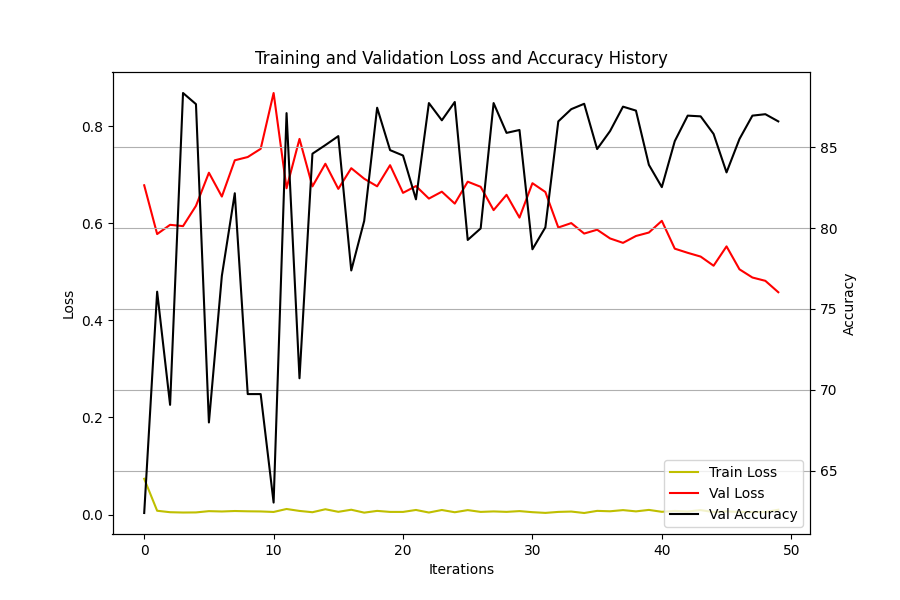

In [31]:
plt.close('all')
plt.figure(figsize = (9, 6))

# Plot loss
ax_loss = plt.gca()
ax_loss.set_xlabel('Iterations')
ax_loss.set_ylabel('Loss')
plt.title('Training and Validation Loss and Accuracy History')
p1 = ax_loss.plot(train_loss, 'y', label = 'Train Loss')
p2 = ax_loss.plot(valid_loss, 'r', label = 'Val Loss')

# Get twin axis and plot accuracy
ax_acc = ax_loss.twinx()  
ax_acc.set_ylabel('Accuracy') 
p3 = ax_acc.plot(valid_acc, 'k', label = 'Val Accuracy')
legends = [l.get_label() for l in p1+p2+p3]
plt.grid()
ax_acc.legend(p1+p2+p3, legends)
plt.show()

### 1.C.c Test the model on a test image
[Back to table of contents](#ToC_2_WT)

Now that the training is complete, we can test our model on a test image. Run the next cell to view the test image and the target image that we are trying to obtain.
<div class="alert alert-info">
    <b>Note:</b> If you click on <code>Options</code>, you can enable the <code>Joint Zoom</code> and zoom into different areas of the image to see how the pixels are classified.
</div>

In [32]:
plt.close('all')
view = viewer([input_img_test, label_img_test], title=['Test Image', 'Ground Truth'], subplots=(1,2), widgets=True)

First, we will load the best-performing model from the disk using [`torch.load`](https://pytorch.org/docs/stable/generated/torch.load.html) together with [`load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.load_state_dict), since we saved it during training. Run the next cell to do so.

In [33]:
model.load_state_dict(torch.load('./best_model_without_weights.pt'))

<All keys matched successfully>

Next we convert the input test image to a PyTorch tensor and extract the correct classes from the target test image as we did for the training and test validation sets. Run the next cell to do so.

In [34]:
# Create test labels (with the correct RGB calues and the indexes that should have these values)
pixel_rgb_val_test, test_label_class_index = np.unique(label_img_test.reshape((-1, 3)), axis=0, return_inverse=True)
# Flatten the input and make it of type float
net_input_test = torch.FloatTensor(input_img_test.reshape((-1, 3)))
# Make the target class a tensor of type long
net_target_test = torch.LongTensor(test_label_class_index)
print(f'The three unique RGB values of the labeled image are:\n{pixel_rgb_val_test}')

The three unique RGB values of the labeled image are:
[[ 88  78 109]
 [159 134 142]
 [187 180 180]]


Now we can simply provide the test image as an input to our model and compare it's output with the test target. Run the next cell to do so.

In [35]:
# Tell the model that we are in evaluation mode
model.eval()
# Generate prediciton
y_hat = model(net_input_test)
# Extract the corresponding classes from the one-hot encoded output vecotor
_, predicted = torch.max(y_hat.data, 1)
# Calculate the accuracy
correct = (predicted == net_target_test).sum().item()
test_accuracy = correct / len(net_target_test) * 100
print(f'Test accuracy: {test_accuracy:.2f} %\n')
# Create the model output image
predicted_img = pixel_rgb_val_test[predicted.data.cpu().numpy()].reshape(input_img_test.shape)
# Display
plt.close('all')
view = viewer([input_img_test, predicted_img, label_img_test], title=['Test image', 'Model output', 'Correct classification'], subplots=(2,2))

Test accuracy: 80.22 %



Button(description='Show Widgets', style=ButtonStyle())

<div class="alert alert-info">

**Note:** It was actually expected that one of the three classes is very badly classified! Check the next section to find out why and how to compensate for that.
</div>

### 1.C.d. Classwise accuracy
[Back to table of contents](#ToC_2_WT)

As you saw above, the test accuracy for the entire dataset is fairly okay ($\sim 80\%$). However, the output results do not seem to classify correctly one of the classes. Why does this happen? To investigate this, let's first look into the classwise accuracy, instead of the total accuarcy, meaning that we calculate the accuracy of each class separately. Run the cell below to see how the model performs on each one of the three classes.
<div class="alert alert-info">
    <b>Note:</b> The accuracy changes each time you re-train your model because the dataset is shuffled again each time. If you want to see a good improvement in the next section, re-run the training until you have a very low accuracy for class 0. Normally this is not at all what we want from a model, but here it is preferable for illustration purposes.
</div>

In [36]:
cls0_acc_wo = 100 * np.logical_and((predicted == 0).data.cpu(), (net_target_test == 0).data.cpu()).sum().item()/(net_target_test == 0).sum().item()
cls1_acc_wo = 100 * np.logical_and((predicted == 1).data.cpu(), (net_target_test == 1).data.cpu()).sum().item()/(net_target_test == 1).sum().item()
cls2_acc_wo = 100 * np.logical_and((predicted == 2).data.cpu(), (net_target_test == 2).data.cpu()).sum().item()/(net_target_test == 2).sum().item()
print('Test accuracy (classwise)\nclass 0: %.2f %% class 1: %.2f %% class 2: %.2f %%' % (cls0_acc_wo,cls1_acc_wo,cls2_acc_wo))

Test accuracy (classwise)
class 0: 0.00 % class 1: 64.67 % class 2: 96.30 %


As you see, the model performs much worse at identifying class $0$ compared to the other two classes. This phenomenon is called the class imbalance problem and is a result of the fact that some of our classes, like class $0$, are underrepresented in the training data. You can easily see this if you look at the [`label_img`](#1.-Multiclass-pixel-classification) image and think about how many of the total pixels belong to which class.

## 1.D. Class imbalance problem
[Back to table of contents](#ToC_2_WT)

First of all, let's check how well our three classes are actually represented in our dataset. Run the cell below to calculate the ratio each one of the classes compared to the total amount of pixels in our training image.

In [37]:
_, train_label_class_counts = np.unique(label_img.reshape((-1, 3)), axis=0, return_counts=True)
# Compute class ratios
class_ratio = train_label_class_counts/sum(train_label_class_counts)
print(f'Ratio of the number of pixels for each class:\nClass 0: {class_ratio[0]*100:.2f}%, Class 1: {class_ratio[1]*100:.2f}%, Class 2: {class_ratio[2]*100:.2f}%\n')

Ratio of the number of pixels for each class:
Class 0: 2.00%, Class 1: 38.29%, Class 2: 59.71%



As you can see, class $0$ only represents $2\%$ of all pixels in the training image, which makes it clear why our network had a hard time classifying it correctly.

Unfortunately, this is a common issue in practice, especially in the medical imaging area, where abnormal data are rare compared to normal cases. The question remains, how can compensate for that? 

### 1.D.a. Add weights to the loss function (1 point)
[Back to table of contents](#ToC_2_WT)

One of the easiest ways to address this issue is to add a weight $w_i$ to the loss function that corresponds to the representation of class $i$. Our new cross-entropy loss thus becomes: 
$$\operatorname{H}(x, i) = w_i\left(-\log\left(\frac{e^{x_i}}{\sum_{j=1}^C e^{x_j}}\right)\right)$$

The final batch loss is then normalized for each minibatch of size $N$:

$$\operatorname{BatchLoss} =  \frac{\sum^{N}_{n=1}\operatorname{H}(x^{(n)}, i^{(n)})}{\sum^{N}_{n=1} w_{i^{(n)}}}.$$

There are many different ways to calculate these weights, but here we will simply use <b>the inverse of the class ratios stored in the parameter `class_ratio`</b> that we calculated in the above cell. To add the weights to the cross-entropy loss function in PyTorch, you can simply use `loss_fn = torch.nn.CrossEntropyLoss(weight=weights)`, but this step is already implemented for you. 

All you need to do in the next cell, **for 1 point**, is to complete the function `calc_weights` that calculates the correct weights according to the parameter `class_counts`, an array of the size $(n, )$ (where $n$ is the number of classes) and returns the weights in the parameter `weights`.

In [39]:
def calc_weights(class_counts):
    # Calculate the correct weights
    weights = None

    # YOUR CODE HERE
    class_ratio = class_counts / sum(class_counts)
    weights = 1.0 / class_ratio
    
    return weights

# Convert the weights to a tensor and re-create the loss function
weights_tc = torch.FloatTensor(calc_weights(train_label_class_counts))
loss_fn = torch.nn.CrossEntropyLoss(weight=weights_tc)

Now let's re-run the training with the new loss function and see if the classwise accuracy improved. Run the cell below to train your model again for 50 minibatches.

In [40]:
# Reinitialize the model for fair comparison, and link to new optimizer object  
model = build_model()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
train_loss, valid_loss, valid_acc = train(model, train_loader, valid_loader, optimizer, loss_fn, max_iter=50, save_model_name='best_model_with_weights')

print('\nFinished training!')

Iteration  1: train loss=  0.0645  valid_loss=  3.0513  valid_acc= 1.82 %  best accuracy(@iter 0)= 1.82
Iteration  2: train loss=  0.0323  valid_loss=  3.5614  valid_acc=58.62 %  best accuracy(@iter 1)=58.62
Iteration  3: train loss=  0.0412  valid_loss=  2.6357  valid_acc=57.24 %  best accuracy(@iter 1)=58.62
Iteration  4: train loss=  0.0232  valid_loss=  2.4597  valid_acc=23.38 %  best accuracy(@iter 1)=58.62
Iteration  5: train loss=  0.0246  valid_loss=  2.6520  valid_acc=31.93 %  best accuracy(@iter 1)=58.62
Iteration  6: train loss=  0.0249  valid_loss=  2.1701  valid_acc=31.18 %  best accuracy(@iter 1)=58.62
Iteration  7: train loss=  0.0223  valid_loss=  1.4439  valid_acc=16.67 %  best accuracy(@iter 1)=58.62
Iteration  8: train loss=  0.0125  valid_loss=  1.4531  valid_acc=57.87 %  best accuracy(@iter 1)=58.62
Iteration  9: train loss=  0.0105  valid_loss=  1.8551  valid_acc=28.27 %  best accuracy(@iter 1)=58.62
Iteration 10: train loss=  0.0115  valid_loss=  2.0658  valid_ac

Did the overall accuracy improve? Run the cell below to visualize the training and validation loss history and the evolution of the validation accuracy.

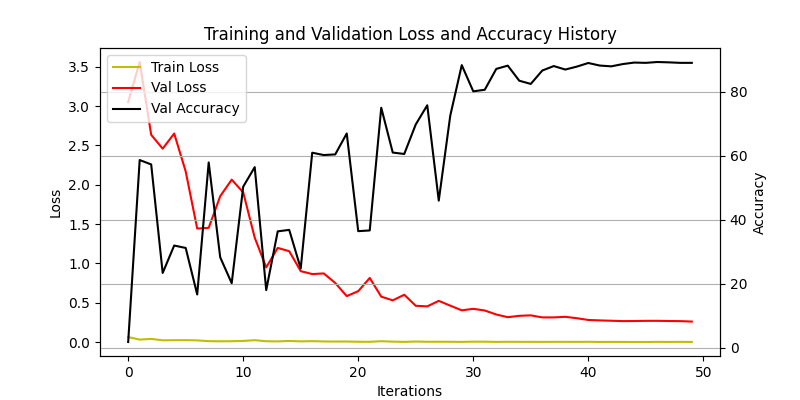

Test accuracy: 83.94 %


In [44]:
plt.close('all')
plt.figure(figsize = (8, 4))

# Plot loss
ax_loss = plt.gca()
ax_loss.set_xlabel('Iterations')
ax_loss.set_ylabel('Loss')
plt.title('Training and Validation Loss and Accuracy History')
p1 = ax_loss.plot(train_loss, 'y', label = 'Train Loss')
p2 = ax_loss.plot(valid_loss, 'r', label = 'Val Loss')

# Get twin axis and plot accuracy
ax_acc = ax_loss.twinx()  
ax_acc.set_ylabel('Accuracy') 
p3 = ax_acc.plot(valid_acc, 'k', label = 'Val Accuracy')
legends = [l.get_label() for l in p1+p2+p3]
plt.grid()
ax_acc.legend(p1+p2+p3, legends)
plt.show()

# Load best model and set to evaluation mode
model.load_state_dict(torch.load('best_model_with_weights.pt'))
model.eval()
# Calculate test accuracy
y_hat = model(net_input_test)
_, predicted = torch.max(y_hat.data, 1)
correct = (predicted == net_target_test).sum().item()
test_accuracy = correct / len(net_target_test) * 100
print('Test accuracy: %.2f %%' % test_accuracy)

Now the total test accuracy might not have changed much, but if we calculate the classwise accuracy again, you should see a major improvement for class $0$. 

Run the cell below to do so and ensure that class $0$ is now classified much better than before. Moreover, we will the input image, the ground truth and the model output. The improvement should be evident.

In [45]:
# Calculate classwise accuracy
cls0_acc_w =  100 * np.logical_and((predicted == 0).data.cpu(), (net_target_test ==0).data.cpu()).sum().item()/(net_target_test ==0).sum().item()
cls1_acc_w = 100 * np.logical_and((predicted == 1).data.cpu(), (net_target_test ==1).data.cpu()).sum().item()/(net_target_test ==1).sum().item()
cls2_acc_w = 100 * np.logical_and((predicted == 2).data.cpu(), (net_target_test ==2).data.cpu()).sum().item()/(net_target_test ==2).sum().item()
print('Test accuracy (classwise)\nclass 0: %.2f %% class 1: %.2f %% class 2: %.2f %%\n' % (cls0_acc_w,cls1_acc_w,cls2_acc_w))
# Create predicted image
predicted_img = pixel_rgb_val[predicted.data.cpu().numpy()].reshape(input_img_test.shape)
# Display
plt.close('all')
view = viewer([input_img_test, predicted_img, label_img_test], title=['Test image', 'Model output', 'Correct classification'], subplots=(2,2))

Test accuracy (classwise)
class 0: 88.09 % class 1: 59.35 % class 2: 94.57 %



Button(description='Show Widgets', style=ButtonStyle())

And finally, let's print both classwise accuracies together for an easy comparison.

In [46]:
print(f'(without weights) class 0: {cls0_acc_wo:.2f} %, class 1: {cls1_acc_wo:.2f} %, class 2: {cls2_acc_wo:.2f} %')
print(f'(with weights)  class 0: {cls0_acc_w:.2f} %, class 1: {cls1_acc_w:.2f} %, class 2: {cls2_acc_w:.2f} %')

(without weights) class 0: 0.00 %, class 1: 64.67 %, class 2: 96.30 %
(with weights)  class 0: 88.09 %, class 1: 59.35 %, class 2: 94.57 %


<div class="alert alert-success">
    
<p><b>Congratulations on finishing the second part of the Neural Networks lab!</b></p>
<p>
Make sure to save your notebook (you might want to keep a copy on your personal computer) and upload it to <a href="https://moodle.epfl.ch/mod/assign/view.php?id=1157357">Moodle</a>, in a zip file with other notebooks of this lab.
</p>
</div>

* Keep the name of the notebook as: *2_NN_Application.ipynb*,
* Name the zip file: *Neural_Networks_Lab.zip*.


<div class="alert alert-danger">
<h4>Feedback</h4>
    <p style="margin:4px;">
    This is the first edition of the image-processing laboratories using Jupyter Notebooks running on Noto. Do not leave before giving us your <a href="https://moodle.epfl.ch/mod/feedback/view.php?id=1157363">feedback here!</a></p>
</div>